## Práctica 04
Crecimiento lineal de la estructura

----



#### Ejercicio 1

Generar con CAMB el espectro de potencias lineal de la materia para un dado conjunto de parámetros cosmológicos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import camb

In [2]:
# Defino los paráetros cosmológicos
# Planck 2018 Cosmological Parameters - Tabla 2 de https://arxiv.org/abs/1807.06209
h_planck = 0.6688
omega_m = 0.321*h_planck**2
omega_cdm = 0.1206
Omega_Lambda = 0.679
omega_b = 0.02212
tau_reio = 0.05522
As = 2.092 * 1.e-9
ns = 0.962
theta_s = 1.04077

In [3]:
# Configurar parámetros cosmológicos
params = camb.CAMBparams()
params.set_cosmology(H0 = 100 * h_planck, ombh2 = omega_b, omch2 = omega_cdm, tau = tau_reio, omk = 0)
params.InitPower.set_params(As = As, ns = ns)

# Configuramos el espectro de potencias de materia
params.set_matter_power(redshifts = [0, 1, 5, 10], kmax = 1000, nonlinear = False) # Me quedo con el espectro lineal de materia a z=0 

results = camb.get_results(params) #Calculamos los resultados

# Obtenemos el espectro de potencias
k, z, pk = results.get_matter_power_spectrum(minkh = 1e-4, maxkh = 1000, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


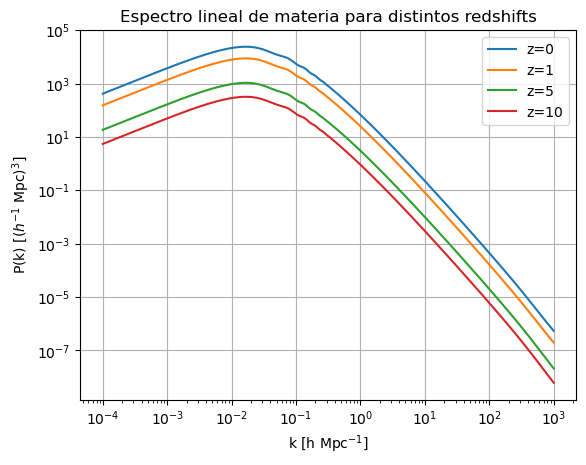

In [4]:
# Graficar
plt.loglog(k, pk[0], label='z=0')
plt.loglog(k, pk[1], label='z=1')
plt.loglog(k, pk[2], label='z=5')
plt.loglog(k, pk[3], label='z=10')
plt.legend(loc='upper right')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('P(k) [$(h^{-1}$ Mpc)$^3$]')
plt.title('Espectro lineal de materia para distintos redshifts')
plt.grid(True)
plt.show()

#### Ejercicio 2

Cambiar $\Omega_m$ y ver como cambia el espectro. Verificar que el máximo se desplaza según lo discutido en la teoría. Variar $\Omega_m$ y $h$ tal que el producto se mantenga constante. Cómo cambia el espectro?

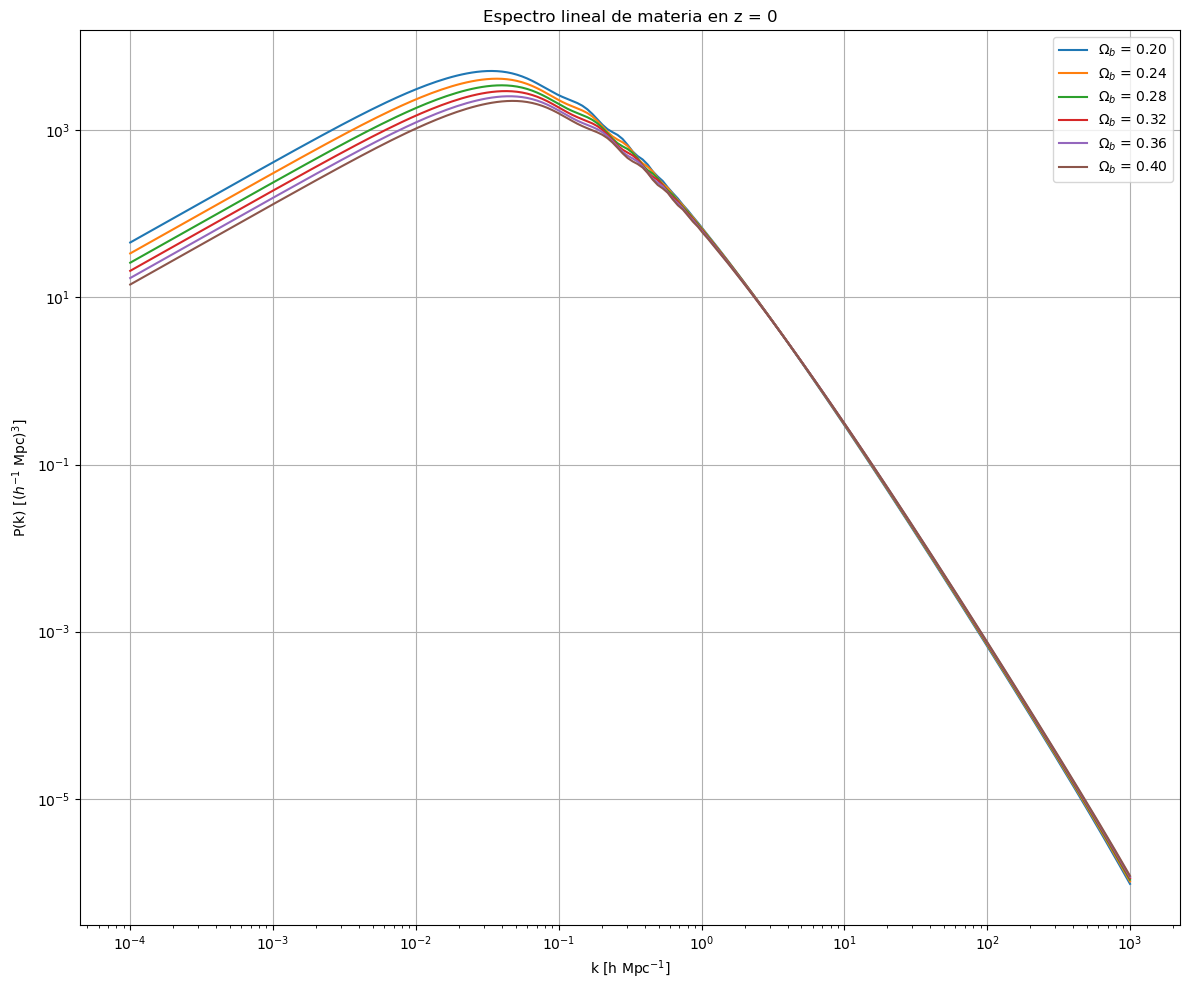

In [5]:
#Definamos como fijo z = 0 y veamos cómo cambia el espectro al variar \Omega_m
omegab = np.linspace(0.2, 0.4, 6)                # Valores de densidad de bariones
h = np.sqrt(0.02212/omegab)                       #Fuerzo a que Omega_b * h^2 = 0.02212
omegacdm = omega_m/(h**2) - omegab

plt.figure(figsize=(12, 10))
for i in range(len(omegab)):
    params = camb.CAMBparams()
    params.InitPower.set_params(As = As, ns = ns)
    params.set_cosmology(H0 = 100 * h[i], ombh2 = omegab[i] * h[i]**2, omch2 = omegacdm[i] * h[i]**2, tau = tau_reio, omk = 0)
    params.set_matter_power(redshifts = [0], kmax = 1000, nonlinear = False)    # Me quedo con el espectro lineal de materia a z=0
    results = camb.get_results(params)                                          # Calculamos los resultados

    k, z, pk = results.get_matter_power_spectrum(minkh = 1e-4, maxkh = 1000, npoints = 200)
    plt.loglog(k, pk[0], label=f'$\Omega_b$ = {omegab[i]:.2f}')
    plt.xlabel('k [h Mpc$^{-1}$]')
    plt.ylabel('P(k) [$(h^{-1}$ Mpc)$^3$]')
    plt.title(f'Espectro lineal de materia en z = 0')
    plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Ejercicio 3

Extraer la evolucion de $\delta_k$ dado un $k$, y graficar. Este ejercicio puede ser no trivial, así que habrá que investigar un poco cómo hacerlo.


In [6]:
# Configuramos los parámetros cosmológicos
z = np.linspace(0, 100, 100)  # Rango de redshifts

params = camb.CAMBparams()
params.set_cosmology(H0 = 100 * h_planck, ombh2 = omega_b, omch2 = omega_cdm, tau = tau_reio, omk = 0)
params.InitPower.set_params(As = As, ns = ns)

params.set_matter_power(redshifts = z, kmax = 1000, nonlinear = False)
results = camb.get_results(params)
kh, zs, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1000, npoints=200)

Note: redshifts have been re-sorted (earliest first)


In [7]:
k_esp = 0.1012  # Elegimos un valor de k específico
idx_k = np.argmin(np.abs(kh - k_esp))
k_real = kh[idx_k]

# Usamos que δ_k = sqrt(P(k))
delta_k = np.sqrt(pk[:, idx_k])

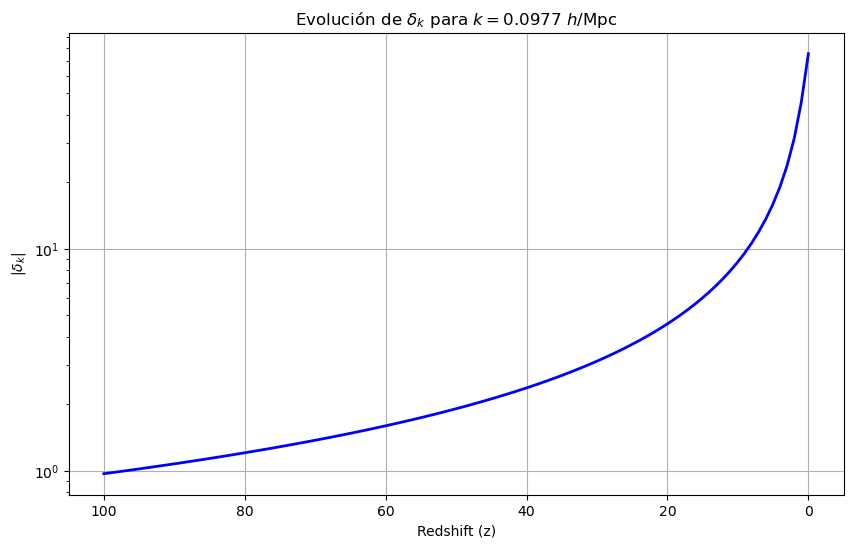

In [8]:
# Graficar evolución
plt.figure(figsize=(10, 6))
plt.semilogy(z, delta_k, 'b-', linewidth=2)
plt.xlabel('Redshift (z)')
plt.ylabel(r'$|\delta_k|$')
plt.title(r'Evolución de $\delta_k$ para $k = %.4f$ $h/$Mpc' % k_real)
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

#### Ejercicio 4

Obtener el factor de crecimiento, y ver cómo cambia al cambiar parámetros cosmológicos. De cuales depende más?

In [9]:
# Parámetros base (Planck 2018)
h_planck = 0.6688
omega_m = 0.321*h_planck**2
omega_cdm = 0.1206
Omega_Lambda = 0.679
omega_b = 0.02212
tau_reio = 0.05522
As = 2.092 * 1.e-9
ns = 0.962
theta_s = 1.04077

In [10]:
# Configuración base de CAMB
def setup(omega_m, omega_de, w = -1, wa = 0):
    params = camb.CAMBparams()
    params.set_cosmology(
        H0 = 100 * h_planck,
        ombh2 = omega_b,
        omch2 = omega_m - omega_b,
        omk = 1 - omega_m - omega_de)
    params.DarkEnergy.set_params(w = w, wa = wa)
    params.InitPower.set_params(As = As, ns =ns)
    return params

# Calcula el factor de crecimiento D(a)
def growth_factor(params):
    z = np.linspace(0, 10, 100)
    a = (1 + z)**(-1)   # Factor de escala
    
    # Configurar cálculo
    params.set_matter_power(redshifts = z, kmax = 1000, nonlinear = False)
    
    # Calculamos
    results = camb.get_results(params)
    kh, zs, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1000, npoints=200)
    
    k_esp = 0.1012  # Elegimos un valor de k específico
    idx_k = np.argmin(np.abs(kh - k_esp))
    delta_k = np.sqrt(pk[:, idx_k])
    
    # Factor de crecimiento D(a) = δ(a)/δ(a=1)
    D = delta_k / delta_k[0]  # Normalizado a z=0
    
    return a, D

In [11]:
# Caso base (ΛCDM)
params_base = setup(omega_m=0.315, omega_de=0.685)
a_base, D_base = growth_factor(params_base)

# Variamos la densidad de materia
params_high_om = setup(omega_m=0.4, omega_de=0.6)
_, D_high_om = growth_factor(params_high_om)

params_low_om = setup(omega_m=0.2, omega_de=0.8)
_, D_low_om = growth_factor(params_low_om)

# Variamos la ecuación de estado (w)
params_w_high = setup(omega_m=0.315, omega_de=0.685, w=-0.6)
_, D_w_high = growth_factor(params_w_high)

params_w_low = setup(omega_m=0.315, omega_de=0.685, w=-1.6)
_, D_w_low = growth_factor(params_w_low)



Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


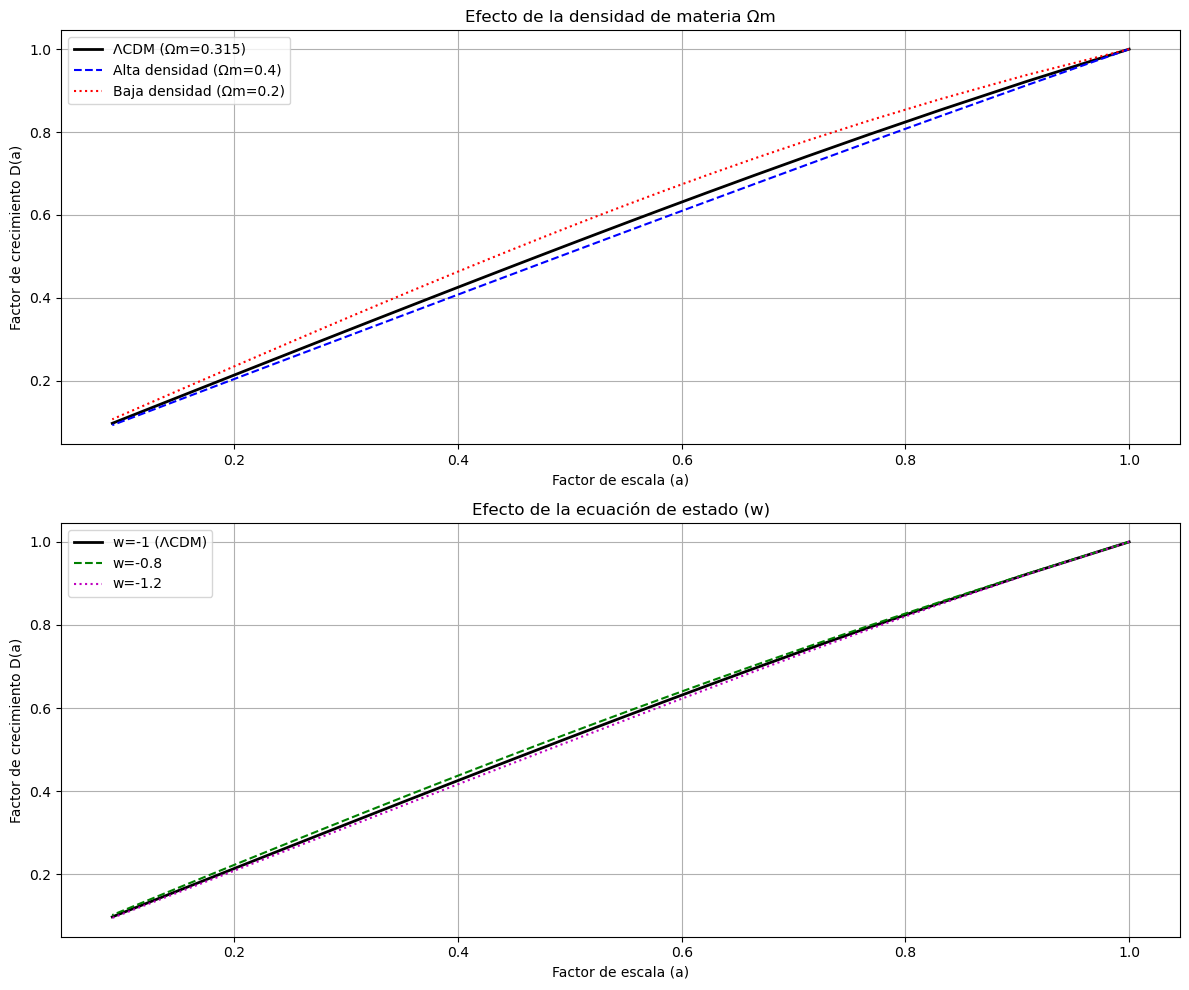

In [12]:
# Graficamos
plt.figure(figsize=(12, 10))

# Factor de crecimiento vs factor de escala
plt.subplot(2, 1, 1)
plt.plot(a_base, D_base, 'k-', lw=2, label='ΛCDM (Ωm=0.315)')
plt.plot(a_base, D_high_om, 'b--', label='Alta densidad (Ωm=0.4)')
plt.plot(a_base, D_low_om, 'r:', label='Baja densidad (Ωm=0.2)')
plt.xlabel('Factor de escala (a)')
plt.ylabel('Factor de crecimiento D(a)')
plt.title('Efecto de la densidad de materia Ωm')
plt.legend()
plt.grid(True)

# Efecto de w
plt.subplot(2, 1, 2)
plt.plot(a_base, D_base, 'k-', lw=2, label='w=-1 (ΛCDM)')
plt.plot(a_base, D_w_high, 'g--', label='w=-0.8')
plt.plot(a_base, D_w_low, 'm:', label='w=-1.2')
plt.xlabel('Factor de escala (a)')
plt.ylabel('Factor de crecimiento D(a)')
plt.title('Efecto de la ecuación de estado (w)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Vemos entonces que el factor de crecimiento depende más de $\Omega_m$ que del $\omega$ de la ecuación de estado

#### Ejercicio 5

Obtener la función de transferencia, y ver cómo cambia al cambiar parámetros cosmológicos. De cuales depende más?

Por problemas con CAMB usemos CLASS para obtener las funciones de transferencia

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [14]:
# Planck 2018 Cosmological Parameters - Tabla 2 de https://arxiv.org/abs/1807.06209
h_planck = 0.6688              # TT,TE,EE+lowE
omega_m = 0.321*h_planck**2   # TT,TE,EE+lowE
omega_cdm = 0.1206            # TT,TE,EE+lowE
Omega_Lambda = 0.679          # TT,TE,EE+lowE
omega_b = 0.02212              # TT,TE,EE+lowE
tau_reio = 0.05522              # TT,TE,EE+lowE
As = 2.092 * 1.e-9             # TT,TE,EE+lowE
ns = 0.962                    # TT,TE,EE+lowE
theta_s = 1.04077              # TT,TE,EE+lowE

In [15]:
# Configuramos el CLASS con los parametros que queremos
colors = ['#3C536D', '#DAC746', '#DC4D57', '#3390D7']
k_out_in_h = [0.001, 1, 0.1]
k_out = [i*h_planck for i in k_out_in_h]  # 1/Mpc    Los k tienen que estar en unidades de 1/Mpc para estas funciones.

cosmo = Class()
lcdm_settings = {'omega_b':omega_b,'Omega_cdm' : omega_cdm/h_planck**2,'100*theta_s': theta_s,'A_s' : As
                 ,'n_s':ns,'tau_reio':tau_reio, 'YHe': 'BBN','output':'tCl mPk dTk vTk','gauge':'synchronous',
                 'P_k_max_h/Mpc':5000.0, 'format': 'camb', 'ic' : 'ad','P_k_ini type' : 'analytic_Pk',
                 'z_pk': 0, 'Omega_k' : 0., 'N_ncdm' : 0}
cosmo.set(lcdm_settings)

cosmo.compute()

background = cosmo.get_background()
transfer = cosmo.get_transfer()

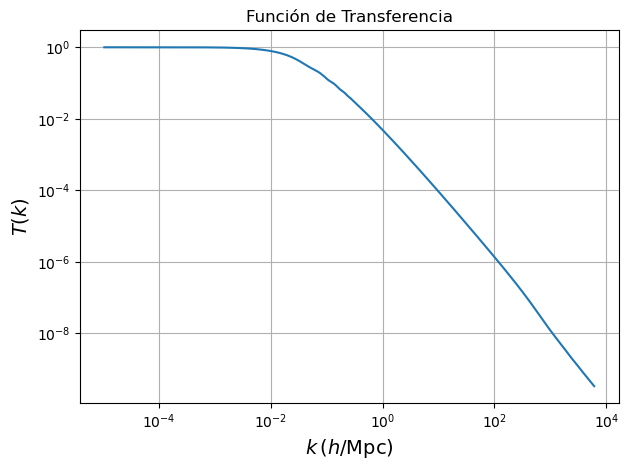

In [16]:
k_values = np.array(transfer['k (h/Mpc)'])
Tk = np.array(transfer['phi']/transfer['phi'][0])

plt.plot(k_values, Tk)
plt.title('Función de Transferencia')
plt.xlabel(r'$k \, (h/\text{Mpc})$', fontsize=14)
plt.ylabel(r'$T(k)$', fontsize=14)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.yscale('log')  # Escala logarítmica en el eje y
plt.grid()

plt.tight_layout()
plt.show()

Veamos cómo varía la función de transferencia para distintos parámetros cosmológicos

In [17]:
#Ahora vamos a calcular las funciones de transferencia para diferentes parámetros cosmológicos
def compute_transfer_function(omega_b = omega_b, omega_cdm = omega_cdm, ns = ns, omegak = 0):
    # Configurar CLASS
    cosmo = Class()
    settings = {
        'omega_b': omega_b,
        'Omega_cdm': omega_cdm / h_planck**2,
        '100*theta_s': theta_s,
        'A_s': As,
        'n_s': ns,
        'tau_reio': tau_reio,
        'YHe': 0.25,
        'output': 'tCl mPk dTk vTk',
        'gauge': 'synchronous',
        'P_k_max_h/Mpc': 5000.0,
        'format': 'camb',
        'ic': 'ad',
        'P_k_ini type': 'analytic_Pk',
        'z_pk': 0,
        'Omega_k': omegak,
    }
    
    cosmo.set(settings)
    cosmo.compute()
    
    # Obtener k y T(k)
    k = cosmo.get_transfer()['k (h/Mpc)']  # k en h/Mpc
    T_k = cosmo.get_transfer()['phi'] / cosmo.get_transfer()['phi'][0]  # T(k) a z=0
    
    return k, T_k

In [18]:
#Caso base (ΛCDM)
k_base, T_base = compute_transfer_function()
# Variaciones
# a) Cambio materia oscura
k_high_cdm, T_high_cdm = compute_transfer_function(omega_cdm = 0.1206 * 2/h_planck**2)
k_low_cdm, T_low_cdm = compute_transfer_function(omega_cdm = 0.1206 / (2 * h_planck**2))
# b) Cambio bariones
k_high_b, T_high_b = compute_transfer_function(omega_b = omega_b * 1.5)
k_low_b, T_low_b = compute_transfer_function(omega_b = omega_b * 0.5)
# c) Cambio el índice espectral
k_high_ns, T_high_ns = compute_transfer_function(ns = 1.5)
k_low_ns, T_low_ns = compute_transfer_function(ns = 0.5)
# d) Cambio la curvatura del espacio
k_high_omegak, T_high_omegak = compute_transfer_function(omegak = 0.02) # Universo cerrado
k_low_omegak, T_low_omegak = compute_transfer_function(omegak = -0.02) # Universo abierto

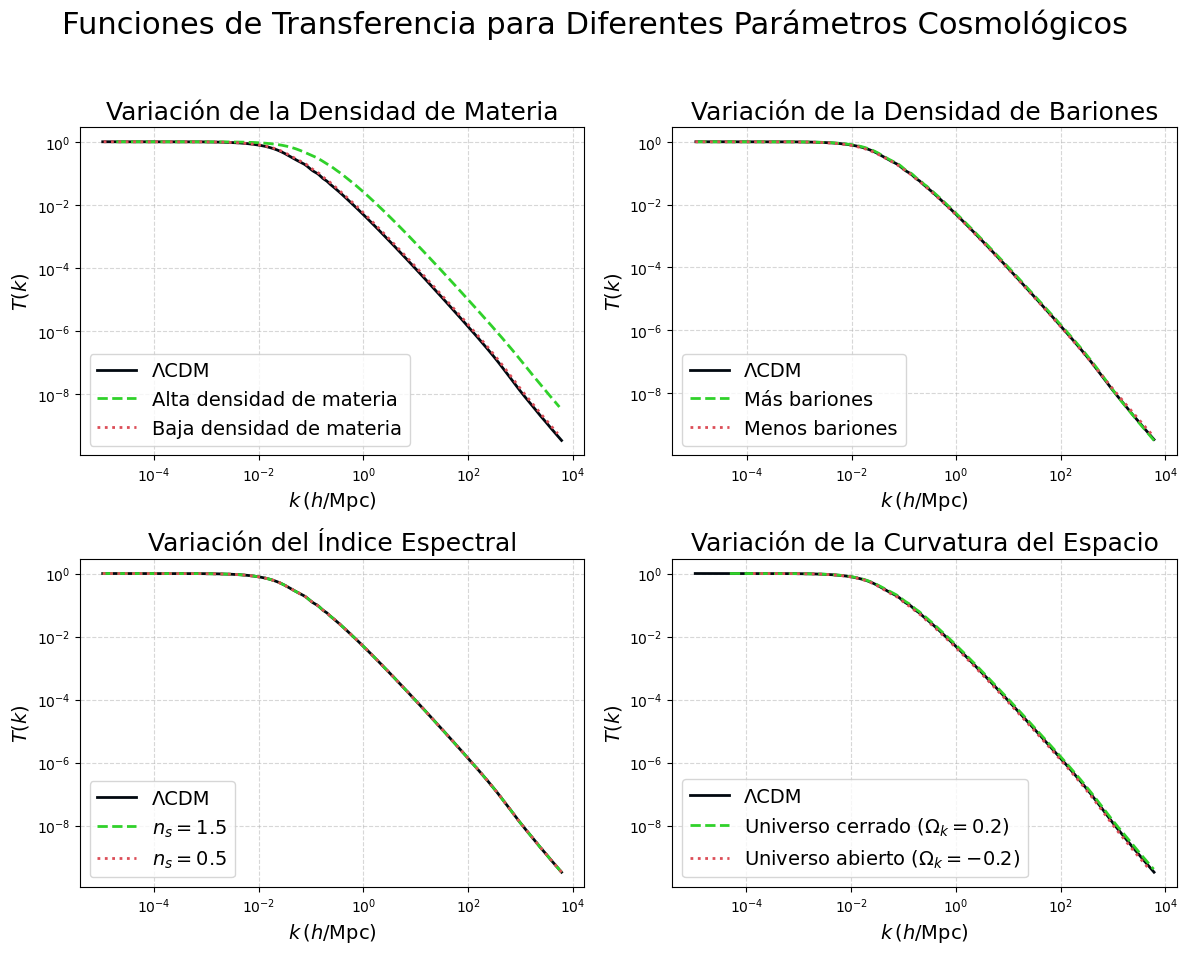

In [19]:
#Grafiquemos las funciones de transferencia
colors = ["#01080F", "#30D12A", '#DC4D57']
def plot_transfer_function(k, T_k, label, color, linestyle='-', linewidth=2):
    plt.plot(k, T_k, label=label, color=color, linestyle=linestyle, linewidth=linewidth)
    plt.xlabel(r'$k \, (h/\text{Mpc})$', fontsize=14)
    plt.ylabel(r'$T(k)$', fontsize=14)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=14, loc='lower left')
    plt.grid(True, which="both", ls="--", alpha=0.5)

plt.figure(figsize=(12, 10))
plt.suptitle('Funciones de Transferencia para Diferentes Parámetros Cosmológicos', fontsize=22)
plt.subplot(2, 2, 1)
plot_transfer_function(k_base, T_base, 'ΛCDM', colors[0])
plot_transfer_function(k_high_cdm, T_high_cdm, 'Alta densidad de materia', colors[1], linestyle='--')
plot_transfer_function(k_low_cdm, T_low_cdm, 'Baja densidad de materia', colors[2], linestyle=':')
plt.title('Variación de la Densidad de Materia', fontsize=18)
plt.subplot(2, 2, 2)
plot_transfer_function(k_base, T_base, 'ΛCDM', colors[0])
plot_transfer_function(k_high_b, T_high_b, 'Más bariones', colors[1], linestyle='--')
plot_transfer_function(k_low_b, T_low_b, 'Menos bariones', colors[2], linestyle=':')
plt.title('Variación de la Densidad de Bariones', fontsize=18)
plt.subplot(2, 2, 3)
plot_transfer_function(k_base, T_base, 'ΛCDM', colors[0])
plot_transfer_function(k_high_ns, T_high_ns, r'$n_s = 1.5$', colors[1], linestyle='--')
plot_transfer_function(k_low_ns, T_low_ns, r'$n_s = 0.5$', colors[2], linestyle=':')
plt.title('Variación del Índice Espectral', fontsize=18)
plt.subplot(2, 2, 4)
plot_transfer_function(k_base, T_base, 'ΛCDM', colors[0])
plot_transfer_function(k_high_omegak, T_high_omegak, r'Universo cerrado $(\Omega_k = 0.2)$', colors[1], linestyle='--')
plot_transfer_function(k_low_omegak, T_low_omegak, r'Universo abierto $(\Omega_k = -0.2)$', colors[2], linestyle=':')
plt.title('Variación de la Curvatura del Espacio', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Ejercicio 6

El CAMB permite elegir modelos de crecimiento no lineal de las estructuras. Genere con el CAMB el $P(k)$ no lineal según distintos modelos, y compare con el espectro lineal.

Grafique a distintos redshifts, y compruebe que la escala donde son importantes las no linealidades se hace más grande a medida que aumenta el tiempo (redshifts más bajos).

In [20]:
# Configurar parámetros cosmológicos
params = camb.CAMBparams()
params.set_cosmology(H0 = 100 * h_planck, ombh2 = omega_b, omch2 = omega_cdm, tau = tau_reio, omk = 0)
params.InitPower.set_params(As = As, ns = ns)

# Configuramos el espectro de potencias de materia
params.set_matter_power(redshifts = [0, 2, 5, 10], kmax = 1000, nonlinear = False) 

results = camb.get_results(params) #Calculamos los resultados

# Obtenemos el espectro de potencias
kl, zl, pkl = results.get_matter_power_spectrum(minkh = 1e-4, maxkh = 1000, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


In [21]:
# Configuramos el espectro de potencias de materia no lineal
params.set_matter_power(redshifts = [0, 2, 5, 10], kmax = 1000, nonlinear = True) 
results = camb.get_results(params) #Calculamos los resultados

# Obtenemos el espectro de potencias
knl, znl, pknl = results.get_matter_power_spectrum(minkh = 1e-4, maxkh = 1000, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


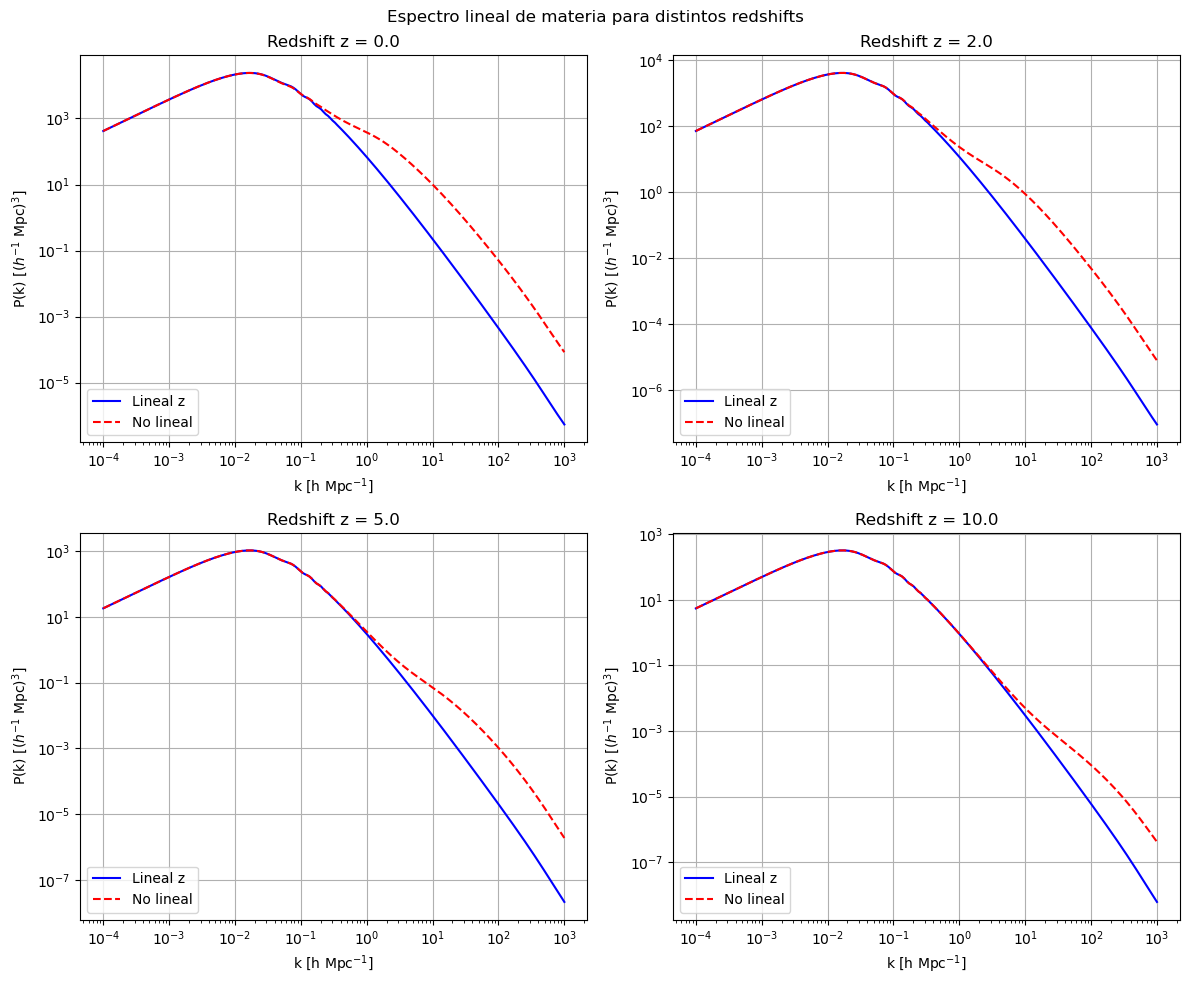

In [22]:
# Graficar
plt.figure(figsize=(12, 10))
plt.suptitle('Espectro lineal de materia para distintos redshifts')
for i in range(len(zl)):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Redshift z = {zl[i]:.1f}')
    plt.loglog(kl, pkl[i], label=f'Lineal z', color='blue', linestyle='-')
    plt.loglog(knl, pknl[i], label=f'No lineal', color='red', linestyle='--')
    plt.legend(loc='upper right')
    plt.xlabel('k [h Mpc$^{-1}$]')
    plt.ylabel('P(k) [$(h^{-1}$ Mpc)$^3$]')
    plt.legend(loc='lower left')
    plt.grid(True)
plt.tight_layout()
plt.show()